In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

import numpy as np
from scipy import stats

# add the path to the abcTau package
import sys
#sys.path.append('./abcTau')
sys.path.append('C:\\Users\\ipochino\\AppData\\Local\\anaconda3\\envs\\isttc\\Lib\\site-packages\\abcTau') # IP: replaced previous line with that; relative path was not working
import abcTau

from isttc.scripts.cfg_global import project_folder_path

In [3]:
results_folder = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau\\'

results_folder_abctau = project_folder_path + 'results\\synthetic\\results\\param_fr_alpha_tau_abctau\\'

abctau_runs = {'abctau_run1_ou': results_folder_abctau + 'all_abctau_run1_ou\\final_results\\',
               'abctau_run2_dst_gamma': results_folder_abctau + 'all_abctau_run2_dst_gamma\\final_results\\',
               'abctau_run3_dst_gamma': results_folder_abctau + 'all_abctau_run3_dst_gamma\\final_results\\',
               'abctau_run4_dst_gamma': results_folder_abctau + 'all_abctau_run4_dst_gamma\\final_results\\'} 

In [22]:
# load abc results
filename = 'spike_train_0_steps22'
abc_results = np.load(abctau_runs['abctau_run4_dst_gamma'] + filename + '.npy', allow_pickle=True)
ind = filename.find('steps') 
final_step = int(filename[ind+5] + filename[ind+6])

# extract estimated parameters
theta_accepted = abc_results[final_step-1]['theta accepted']
tau1 = theta_accepted[0]

# extract the development of the error threshold and acceptance rate during fitting (discarding first iteration)
eps = []
accR = []
steps = np.arange(1,final_step+1)[1:]
for i in range(final_step): 
    step_results = abc_results[i]
    eps.append(step_results['epsilon'])
    accR.append(step_results['n accepted']/step_results['n total'])
# eps = eps[1:]
# accR = accR[1:]


In [23]:
eps

[np.float64(1.0),
 np.float64(0.0383413085776924),
 np.float64(0.036694921497715645),
 np.float64(0.035472767309823766),
 np.float64(0.034564731750655664),
 np.float64(0.033769985684608275),
 np.float64(0.03300193463058851),
 np.float64(0.03240481711429291),
 np.float64(0.03180603684370381),
 np.float64(0.031117513920077753),
 np.float64(0.030527776405471344),
 np.float64(0.029939379446634495),
 np.float64(0.029468072884285348),
 np.float64(0.0289828049383016),
 np.float64(0.02846139782992464),
 np.float64(0.027952746623781038),
 np.float64(0.02743353401747771),
 np.float64(0.02693799081979636),
 np.float64(0.026441009879832306),
 np.float64(0.02602635084707746),
 np.float64(0.02561366136186568),
 np.float64(0.02517770197125629)]

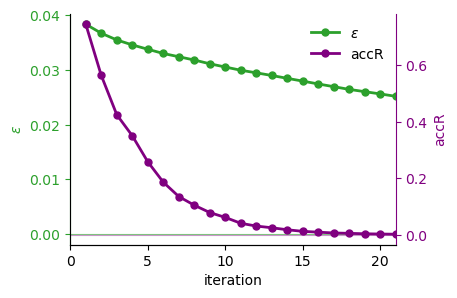

In [24]:
eps = eps[1:]
accR = accR[1:]
x = np.arange(1, len(eps) + 1)

fig, ax1 = plt.subplots(figsize=(4.2, 3.0))

# Left y-axis: epsilon (green)
l1 = ax1.plot(x, eps, marker='o', ms=5, lw=2,
              color='tab:green', markeredgecolor='tab:green')
ax1.set_xlabel('iteration')
ax1.set_ylabel(r'$\varepsilon$', color='tab:green')
ax1.tick_params(axis='y', colors='tab:green')
ax1.spines['left'].set_color('tab:green')
ax1.axhline(0, lw=0.8, color='tab:green', alpha=0.6)
ax1.set_xlim(1, x[-1])
ax1.set_xticks(np.arange(0, x[-1]+1, 5))

# Right y-axis: accR (purple)
ax2 = ax1.twinx()
l2 = ax2.plot(x, accR, marker='o', ms=5, lw=2,
              color='purple', markeredgecolor='purple')
ax2.set_ylabel('accR', color='purple')
ax2.tick_params(axis='y', colors='purple')
ax2.spines['right'].set_color('purple')
ax2.axhline(0, lw=0.8, color='purple', alpha=0.4)

# Legend
lines = l1 + l2
labels = [r'$\varepsilon$', 'accR']
ax1.legend(lines, labels, frameon=False, loc='upper right')

sns.despine() 
ax2.spines['right'].set_visible(True) 

In [ ]:
eps

In [ ]:
abc_singOU[22-1]

In [ ]:
from scipy.stats import gaussian_kde

def compute_map_1d_abctau(result):
    """
    Compute the 1D MAP estimate from abcTau output.
    Method per Zeraati et al. (2022):
      1. Smooth the posterior with Gaussian KDE
      2. Locate the maximum via grid search
    """
    # Extract accepted parameter samples and weights
    theta = np.asarray(result['theta accepted']).squeeze()
    weights = np.asarray(result['weights'])
    weights = weights / np.sum(weights)  # normalize to 1

    # Fit weighted Gaussian KDE (posterior smoothing)
    kde = gaussian_kde(theta, weights=weights)

    # Create fine grid over parameter space
    grid = np.linspace(theta.min(), theta.max(), 2000)

    # Evaluate density and find peak
    density = kde(grid)
    theta_map = grid[np.argmax(density)]

    return theta_map, grid, density


In [ ]:
theta_map, grid, density = compute_map_1d_abctau(abc_singOU[22-1])
print(f"MAP estimate: {theta_map:.3f}")

In [ ]:
plt.plot(grid, density, label='Posterior KDE')
plt.axvline(theta_map, color='r', linestyle='--', label='MAP')
plt.xlabel('Parameter value')
plt.ylabel('Posterior density')
plt.legend()
plt.show()

In [ ]:
# plot the results
tau1 = abc_singOU[22-1]['theta accepted'][0]
fig = plt.figure(figsize = (24,6))

# plotting variables
cABC = 'darkorange'
ctheor = 'gray'
cAccR = 'r'
cErr = 'b'
a = 0.5
lw = 3

ax = plt.subplot(141)
ax.hist(tau1, facecolor= cABC, density=True, alpha = a, label = r'Estimated')
sns.kdeplot(tau1, color = cABC)
#plt.axvline(tau1_gt, color = ctheor, label = r'Ground truth', linewidth = lw, linestyle = '--')

ax.set_xlabel(r'$\tau_1$ [ms]')
ax.set_ylabel('Probability density')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon = False, bbox_to_anchor=(0.4, 1))

fig.tight_layout()
plt.show()

In [ ]:
tau1.shape